In [1]:
import numpy as np
  
from keras.models import Model, Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose, GlobalAveragePooling2D, GlobalMaxPooling2D
from keras.layers import concatenate, LeakyReLU, BatchNormalization, Dense, Flatten, Activation, Reshape, Dropout
from keras.optimizers import *
from keras.datasets import mnist

import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline
import cv2

import h5py
import glob
import imageio

import os
from skimage.io import imsave


Using TensorFlow backend.


In [34]:
def build_generator():
    input1 = Input(shape=(None, None, 3))
    input11 = UpSampling2D()(input1)
    
    model1 = Conv2D(16, (3, 3), strides=(1, 1), padding='same')(input11)
    model1 = LeakyReLU(alpha=0.2)(model1)
    model1 = BatchNormalization(momentum=0.8)(model1)
    model1 = Conv2D(16, (3, 3), strides=(1, 1), padding='same')(model1)
    model1 = LeakyReLU(alpha=0.2)(model1)
    model1 = BatchNormalization(momentum=0.8)(model1)
    
    model2 = Conv2D(32, (3, 3), strides=(2, 2), padding='same')(model1)
    model2 = LeakyReLU(alpha=0.2)(model2)
    model2 = BatchNormalization(momentum=0.8)(model2)
    model2 = Conv2D(32, (3, 3), strides=(1, 1), padding='same')(model2)
    model2 = LeakyReLU(alpha=0.2)(model2)
    model2 = BatchNormalization(momentum=0.8)(model2)
    model2 = Conv2D(32, (3, 3), strides=(1, 1), padding='same')(model2)
    model2 = LeakyReLU(alpha=0.2)(model2)
    model2 = BatchNormalization(momentum=0.8)(model2)

    model3 = Conv2D(64, (3, 3), strides=(2, 2), padding='same')(model2)
    model3 = LeakyReLU(alpha=0.2)(model3)
    model3 = BatchNormalization(momentum=0.8)(model3)
    model3 = Conv2D(64, (3, 3), strides=(1, 1), padding='same')(model3)
    model3 = LeakyReLU(alpha=0.2)(model3)
    model3 = BatchNormalization(momentum=0.8)(model3)
    model3 = Conv2D(64, (3, 3), strides=(1, 1), padding='same')(model3)
    model3 = LeakyReLU(alpha=0.2)(model3)
    model3 = BatchNormalization(momentum=0.8)(model3)
    
    model4 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(model3), model2], axis=3)
    model4 = LeakyReLU(alpha=0.2)(model4)
    model4 = BatchNormalization(momentum=0.8)(model4)
    model4 = Conv2D(32, (3, 3), strides=(1, 1), padding='same')(model4)
    model4 = LeakyReLU(alpha=0.2)(model4)
    model4 = BatchNormalization(momentum=0.8)(model4)
    model4 = Conv2D(32, (3, 3), strides=(1, 1), padding='same')(model4)
    model4 = LeakyReLU(alpha=0.2)(model4)
    model4 = BatchNormalization(momentum=0.8)(model4)
    
    model5 = concatenate([Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(model4), model1], axis=3)
    model5 = LeakyReLU(alpha=0.2)(model5)
    model5 = BatchNormalization(momentum=0.8)(model5)
    model5 = Conv2D(16, (3, 3), strides=(1, 1), padding='same')(model5)
    model5 = LeakyReLU(alpha=0.2)(model5)
    model5 = BatchNormalization(momentum=0.8)(model5)
    model5 = Conv2D(16, (3, 3), strides=(1, 1), padding='same')(model5)
    model5 = LeakyReLU(alpha=0.2)(model5)
    model5 = BatchNormalization(momentum=0.8)(model5)
    
    model6 = concatenate([Conv2D(16, (1, 1), padding='same')(model5), input11], axis=3)
    model6 = LeakyReLU(alpha=0.2)(model6)
    model6 = BatchNormalization(momentum=0.8)(model6)
    model6 = Conv2D(3, (1, 1), activation='tanh', padding='same')(model6)
    
    return Model(inputs=input1, outputs=model6)

def build_discriminator():
    input1 = Input(shape=(None, None, 3))
    input2 = Input(shape=(None, None, 3))
    
    model1 = UpSampling2D()(input1)
    model1 = Conv2D(16, (5, 5), strides=(1,1), padding='same')(model1)
    model1 = LeakyReLU(alpha=0.2)(model1)
    model1 = BatchNormalization(momentum=0.8)(model1)
    model1 = Conv2D(16, (3, 3), strides=(1,1), padding='same')(model1)
    model1 = LeakyReLU(alpha=0.2)(model1)
    model1 = BatchNormalization(momentum=0.8)(model1)
    
    model = Conv2D(16, (5, 5), strides=(1,1), padding='same')(input2)
    model = LeakyReLU(alpha=0.2)(model)
    model = BatchNormalization(momentum=0.8)(model)
    model = Conv2D(16, (3, 3), strides=(1,1), padding='same')(model)
    model = LeakyReLU(alpha=0.2)(model)
    model = BatchNormalization(momentum=0.8)(model)
    model = concatenate([model, model1], axis=3)
    
    model = Conv2D(32, (3, 3), strides=(2,2), padding='same')(model)
    model = LeakyReLU(alpha=0.2)(model)
    model = BatchNormalization(momentum=0.8)(model)
    model = Conv2D(32, (5, 5), strides=(1,1), padding='same')(model)
    model = LeakyReLU(alpha=0.2)(model)
    model = BatchNormalization(momentum=0.8)(model)
    model = Conv2D(32, (3, 3), strides=(1,1), padding='same')(model)
    model = LeakyReLU(alpha=0.2)(model)
    model = BatchNormalization(momentum=0.8)(model)
    
    model = Conv2D(64, (3, 3), strides=(2,2), padding='same')(model)
    model = LeakyReLU(alpha=0.2)(model)
    model = BatchNormalization(momentum=0.8)(model)
    model = Conv2D(64, (5, 5), strides=(1,1), padding='same')(model)
    model = LeakyReLU(alpha=0.2)(model)
    model = BatchNormalization(momentum=0.8)(model)
    model = Conv2D(64, (3, 3), strides=(1,1), padding='same')(model)
    model = LeakyReLU(alpha=0.2)(model)
    model = BatchNormalization(momentum=0.8)(model)
    
    model = Conv2D(128, (3, 3), strides=(2,2), padding='same')(model)
    model = LeakyReLU(alpha=0.2)(model)
    model = BatchNormalization(momentum=0.8)(model)
    model = Conv2D(128, (5, 5), strides=(1,1), padding='same')(model)
    model = LeakyReLU(alpha=0.2)(model)
    model = BatchNormalization(momentum=0.8)(model)
    model = Conv2D(128, (3, 3), strides=(1,1), padding='same')(model)
    model = LeakyReLU(alpha=0.2)(model)
    model = BatchNormalization(momentum=0.8)(model)
    
    model = Conv2D(256, (3, 3), strides=(2,2), padding='same')(model)
    model = LeakyReLU(alpha=0.2)(model)
    model = BatchNormalization(momentum=0.8)(model)
    model = Conv2D(256, (5, 5), strides=(1,1), padding='same')(model)
    model = LeakyReLU(alpha=0.2)(model)
    model = BatchNormalization(momentum=0.8)(model)
    model = Conv2D(256, (3, 3), strides=(1,1), padding='same')(model)
    model = GlobalAveragePooling2D()(model)
    model = LeakyReLU(alpha=0.2)(model)
    model = BatchNormalization(momentum=0.8)(model)
#     model = Flatten()
    model = Dense(1024)(model)
    model = LeakyReLU(alpha=0.2)(model)
    model = BatchNormalization(momentum=0.8)(model)
    model = Dense(512)(model)
    model = LeakyReLU(alpha=0.2)(model)
#     model = BatchNormalization(momentum=0.8)
    model = Dense(1)(model)
    model = Activation('sigmoid')(model)

    return Model(inputs=[input1, input2], outputs=model)

optimizer = Adam(0.0002, 0.5)
generator = build_generator()
generator.compile(loss='binary_crossentropy', optimizer=optimizer)
# generator.summary()

optimizer1 = Adam(0.0002, 0.5)
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=optimizer1, metrics=['accuracy'])
discriminator.summary()
discriminator.trainable = False

# The generator takes noise as input and generates imgs
z = Input(shape=(None, None, 3))
img = generator(z)
# The valid takes generated images as input and determines validity
valid = discriminator([z, img])

# The combined model  (stacked generator and discriminator) takes
# noise as input => generates images => determines validity 
combined = Model(z, [valid, img])
combined.compile(loss=['binary_crossentropy', 'mean_absolute_error'], optimizer=optimizer, metrics = ['accuracy'])

combined.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           (None, None, None, 3 0                                            
__________________________________________________________________________________________________
input_15 (InputLayer)           (None, None, None, 3 0                                            
__________________________________________________________________________________________________
up_sampling2d_8 (UpSampling2D)  (None, None, None, 3 0           input_14[0][0]                   
__________________________________________________________________________________________________
conv2d_101 (Conv2D)             (None, None, None, 1 1216        input_15[0][0]                   
__________________________________________________________________________________________________
conv2d_99 

In [3]:
path = "./data/conditioned_faces_final/"

dirs = os.listdir(path)
print(dirs)
im_names = []
for d in dirs:
    im_names.append(os.listdir(path + d))

for i, d in enumerate(im_names):
    print("%s (index %d) length: %d" % (dirs[i], i, len(d)))
c = 0
def load_batch(path2, filenames, indices):
    batch = []
    c = 0
    for i in indices:
        img = cv2.imread(path2 + filenames[i])
        batch.append(img)
        """
        if(c == 0):
            c += 1
            print(path + filenames[i])
            print(img.shape)
            plt.imshow(img)
            plt.show()
        """
    batch = (np.array(batch) / 127.5) - 1.0
    A, B, C, D = batch.shape
    e = B % 4
    f = C % 4
    return batch[:, :B-e, :C-f, :]
    
batch_size = 5
d = im_names[6]
batch_indices = np.random.randint(0, len(d), size=[batch_size])

path1 = path + dirs[6] + "/"

x_batch = load_batch(path1, d, batch_indices)



['100x100', '128x128', '180x180', '256x256', '310x310', '360x360', '410x410', '480x480', '530x530', '55x55', '590x590', '650x650', '700x700', '70x70', '86x86']
100x100 (index 0) length: 7119
128x128 (index 1) length: 12614
180x180 (index 2) length: 9567
256x256 (index 3) length: 3706
310x310 (index 4) length: 2384
360x360 (index 5) length: 929
410x410 (index 6) length: 443
480x480 (index 7) length: 282
530x530 (index 8) length: 91
55x55 (index 9) length: 8052
590x590 (index 10) length: 17
650x650 (index 11) length: 11
700x700 (index 12) length: 2
70x70 (index 13) length: 7654
86x86 (index 14) length: 7821


(408, 408, 3)


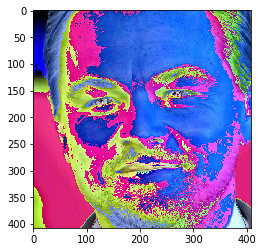

(204, 204, 3)


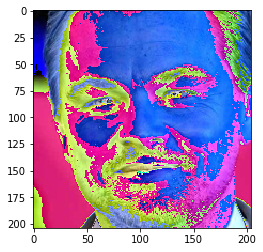

In [4]:
def reduce_resolution(ims):
    O, M, N, P = ims.shape
    K = 2
    L = 2

    MK = M // K
    NL = N // L
    return ims.reshape(-1, MK, K, NL, L, P).mean(axis=(2, 4)).reshape(O, MK, NL, P)

print(x_batch[0].shape)
plt.imshow(x_batch[0])
plt.show()
im = reduce_resolution(x_batch[0:1])
print(im[0].shape)
plt.imshow(im[0])
plt.show()

C:\Users\Daniel\Anaconda3\lib\site-packages\keras\engine\training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: 0.695614, acc.: 49.50%] [G loss: 0.765724]


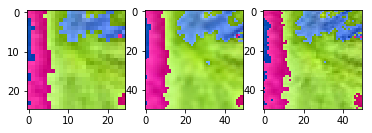

100 [D loss: 0.695724, acc.: 42.00%] [G loss: 0.737817]


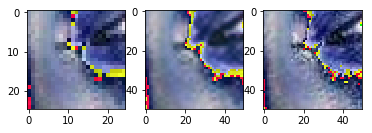

200 [D loss: 0.693164, acc.: 58.75%] [G loss: 0.754412]


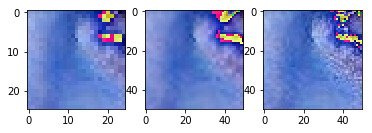

In [ ]:
epochs = 40000
batch_size = 4
half_batch = int(batch_size/2)

# Altered for variable channel 3 size
def reduce_resolution(ims):
    O, M, N, P = ims.shape
    K = 2
    L = 2

    MK = M // K
    NL = N // L
    return ims.reshape(-1, MK, K, NL, L, P).mean(axis=(2, 4)).reshape(O, MK, NL, P)

def upsize(ims):
    return ims.repeat(2, axis = 1).repeat(2, axis = 2)

for epoch in range(epochs):
    ind = 6
    d = im_names[ind]
    path1 = path + dirs[ind] + "/"

    # ---------------------
    #  Train Discriminator
    # ---------------------

    # Select a random half batch of images
    idx = np.random.randint(0, len(d), half_batch)
    imgs = load_batch(path1, d, idx)
    noise = reduce_resolution(imgs)

    idx1 = np.random.randint(0, len(d), half_batch)
    imgs1 = load_batch(path1, d, idx1)
    noise1 = reduce_resolution(imgs1)

    # Generate a half batch of new images
    gen_imgs = generator.predict(noise1)
    # Train the discriminator
    
    d_loss_real = discriminator.train_on_batch([noise, imgs], np.ones((half_batch, 1)))
    d_loss_fake = discriminator.train_on_batch([noise1, gen_imgs], np.zeros((half_batch, 1)))
    d_loss += 0.5 * np.add(d_loss_real, d_loss_fake)

    # ---------------------
    #  Train Generator
    # ---------------------

    idx2 = np.random.randint(0, len(d), batch_size)
    ims2 = load_batch(path1, d, idx2)
    noise2 = reduce_resolution(ims2)

    # The generator wants the discriminator to label the generated samples
    # as valid (ones)
    valid_y = np.array([1] * batch_size)
    
    # Train the generator
    g_loss = combined.train_on_batch(noise2, [valid_y, ims2])
    
    plot_every = 100
    
    if epoch % plot_every == 0:
        # Plot the progress
        print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0]/plot_every, 100*d_loss[1]/plot_every, g_loss[0]))
        fig, ax = plt.subplots(1, 3)
        ax[0].imshow(noise1[0, 75:100, 100:125, :])
        ax[1].imshow(gen_imgs[0, 150:200, 200:250, :])
        ax[2].imshow(imgs1[0, 150:200, 200:250, :])
        plt.show()
        d_loss = [0, 0]


In [45]:
generator.save('./models/generator_faces.h5')
discriminator.save('./models/discriminator_faces.h5')
combined.save('./models/combined_faces.h5')

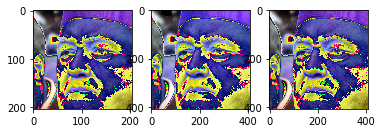

In [36]:
n = 1
fig, ax = plt.subplots(1, 3)
ax[0].imshow(noise1[n])
ax[1].imshow(gen_imgs[n])
ax[2].imshow(imgs1[n])
plt.show()

In [38]:
import scipy
scipy.misc.imsave('gen_img20000.jpg', gen_imgs[n])
scipy.misc.imsave('input_img20000.jpg', noise1[n])
scipy.misc.imsave('original_img20000.jpg', imgs1[n])

C:\Users\Daniel\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  
C:\Users\Daniel\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Daniel\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  after removing the cwd from sys.path.
